In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [18]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [19]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
data = data.rename(index=str, columns={"6":"preg"})
data = data.rename(index=str, columns={"148":"gluco"})
data = data.rename(index=str, columns={"72":"bp"})
data = data.rename(index=str, columns={"35":"stinmm"})
data = data.rename(index=str, columns={"0":"insulin"})
data = data.rename(index=str, columns={"33.6":"mass"})
data =data.rename(index=str, columns={"0.627":"dpf"})
data = data.rename(index=str, columns={"50":"age"})
data = data.rename(index=str, columns={"1":"target"})
 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:

X = data.iloc[:, :-1]
Y = data.iloc[:,8]

In [22]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [23]:

X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [25]:
from keras.models import Sequential
np.random.seed(42)
tf.random.set_seed(42)
 
model=Sequential()
model.add(Dense(15,input_dim=8, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy'])
model_history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))


Epoch 1/200
14/14 [==============================] - 1s 20ms/step - loss: 0.6758 - accuracy: 0.6366 - val_loss: 0.6630 - val_accuracy: 0.6806
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.6597 - val_loss: 0.6585 - val_accuracy: 0.6806
Epoch 3/200
14/14 [==============================] - 0s 13ms/step - loss: 0.6703 - accuracy: 0.6505 - val_loss: 0.6553 - val_accuracy: 0.6806
Epoch 4/200
14/14 [==============================] - 0s 28ms/step - loss: 0.6618 - accuracy: 0.6481 - val_loss: 0.6518 - val_accuracy: 0.6875
Epoch 5/200
14/14 [==============================] - 0s 14ms/step - loss: 0.6622 - accuracy: 0.6481 - val_loss: 0.6487 - val_accuracy: 0.6806
Epoch 6/200
14/14 [==============================] - 0s 12ms/step - loss: 0.6630 - accuracy: 0.6389 - val_loss: 0.6461 - val_accuracy: 0.6806
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6632 - accuracy: 0.6528 - val_loss: 0.6440 - val_accuracy: 0.6806
Epoch 8/

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

6/6 [==============================] - 0s 4ms/step - loss: 0.5280 - accuracy: 0.7396
Test loss: 0.5279621481895447, Test accuracy: 0.7395833134651184


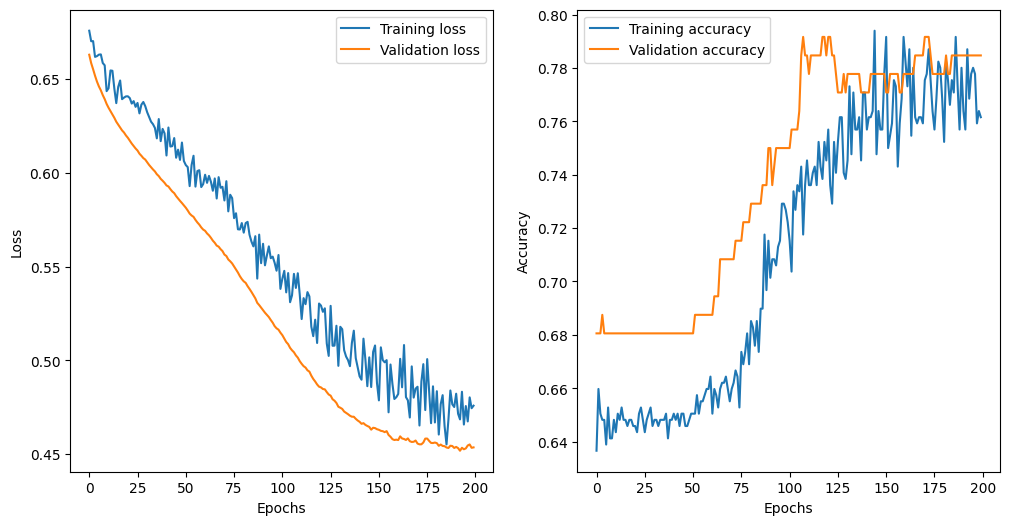

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()